In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


In [2]:
#reading the data
df = pd.read_csv('/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv')

In [3]:
#viewing the data
df.head(3)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

# Processing the Data: 

In [5]:
df = df.drop(['Title', 'Url_spotify', 'Uri', 'Description', 'official_video', 'Channel', 'Url_youtube'], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Danceability      20716 non-null  float64
 6   Energy            20716 non-null  float64
 7   Key               20716 non-null  float64
 8   Loudness          20716 non-null  float64
 9   Speechiness       20716 non-null  float64
 10  Acousticness      20716 non-null  float64
 11  Instrumentalness  20716 non-null  float64
 12  Liveness          20716 non-null  float64
 13  Valence           20716 non-null  float64
 14  Tempo             20716 non-null  float64
 15  Duration_ms       20716 non-null  float64
 16  Views             20248 non-null  float6

In [7]:
df = df.dropna()

In [8]:
df['Views']

0        693555221.0
1         72011645.0
2          8435055.0
3        211754952.0
4        618480958.0
            ...     
20713        71678.0
20714       164741.0
20715        35646.0
20716         6533.0
20717       158697.0
Name: Views, Length: 19549, dtype: float64

# EDA

## most viewed artists on Youtube

In [9]:
df.groupby('Artist').sum()['Views'].sort_values(ascending = False).head(10)

Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099106e+10
Daddy Yankee               1.087193e+10
Bruno Mars                 1.024092e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64

<AxesSubplot:xlabel='Artist'>

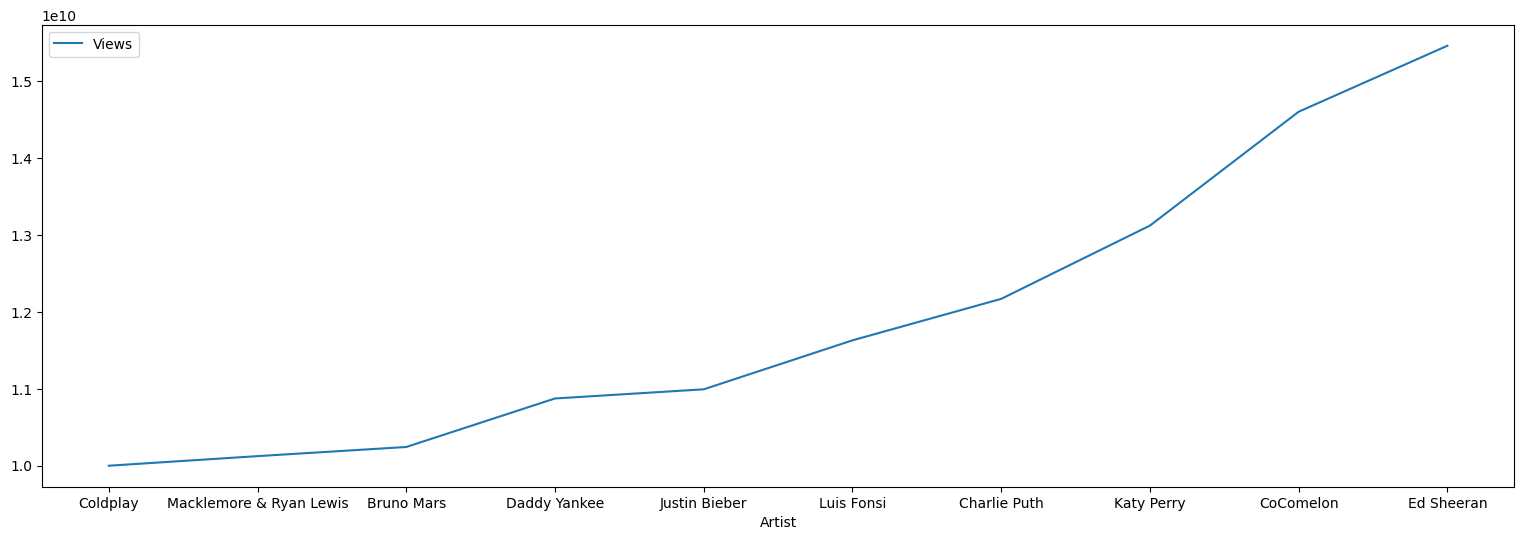

In [10]:
artists = df.groupby('Artist').sum()['Views'].sort_values(ascending = False).head(10)
artists = artists.sort_values(ascending = True)
artists = pd.DataFrame(artists)
plt.figure(figsize=(19,6))
sns.lineplot(artists)

## most streamed artists on Spotify

In [11]:
df.groupby('Artist').sum()['Stream'].sort_values(ascending = False).head(10)

Artist
Post Malone        1.525126e+10
Ed Sheeran         1.439488e+10
Dua Lipa           1.340808e+10
The Weeknd         1.246428e+10
Justin Bieber      1.209777e+10
XXXTENTACION       1.201191e+10
Imagine Dragons    1.185831e+10
Coldplay           1.177848e+10
Khalid             1.138684e+10
Bruno Mars         1.089786e+10
Name: Stream, dtype: float64

<AxesSubplot:xlabel='Artist'>

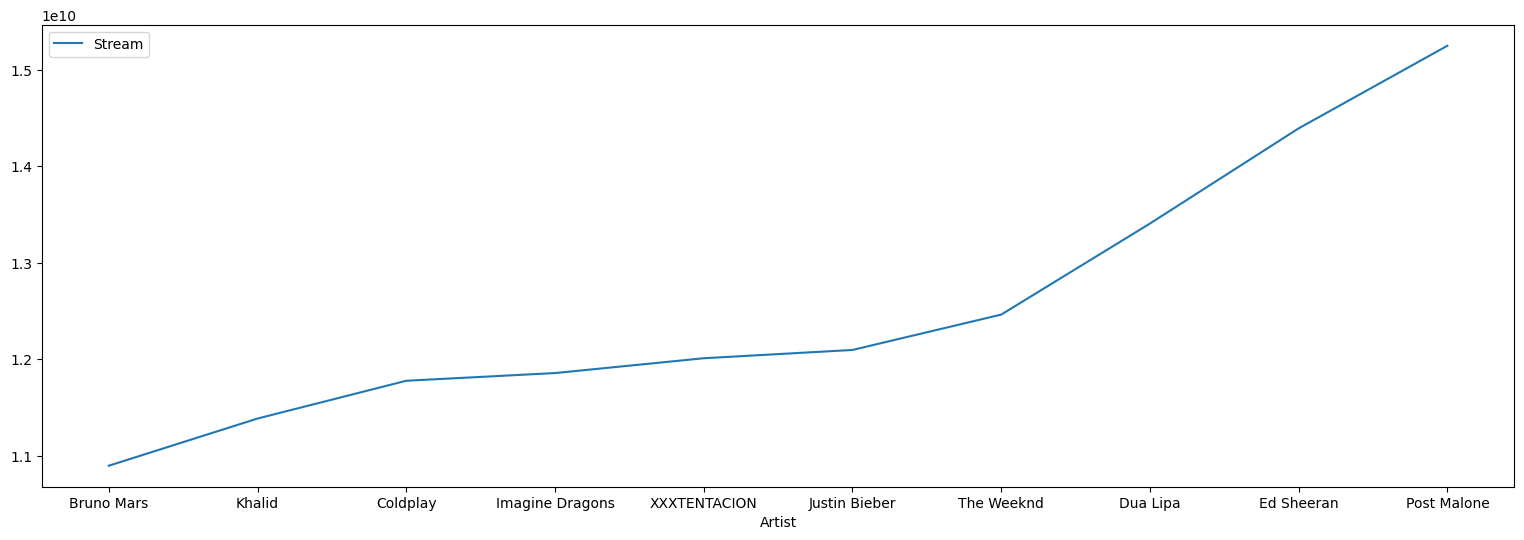

In [12]:
artists2 = df.groupby('Artist').sum()['Stream'].sort_values(ascending = False).head(10)
artists2 = artists2.sort_values(ascending = True)
artists2 = pd.DataFrame(artists2)
plt.figure(figsize=(19,6))
sns.lineplot(artists2)

# most viewed songs on youtube

In [13]:
df.sort_values(by = 'Views', ascending = False)[['Track', 'Artist', 'Views']].head(10)

,Track,Artist,Views
1147,Despacito,Luis Fonsi,8.079649e+09
365,Despacito,Daddy Yankee,8.079647e+09
12452,Shape of You,Ed Sheeran,5.908398e+09
14580,See You Again (feat. Charlie Puth),Charlie Puth,5.773798e+09
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,5.773797e+09
20303,Wheels on the Bus,CoComelon,4.898831e+09
10686,Uptown Funk (feat. Bruno Mars),Mark Ronson,4.821016e+09
8937,Gangnam Style (강남스타일),PSY,4.679767e+09
9569,Sugar,Maroon 5,3.817733e+09
13032,Roar,Katy Perry,3.725749e+09


# top 5 songs on YT

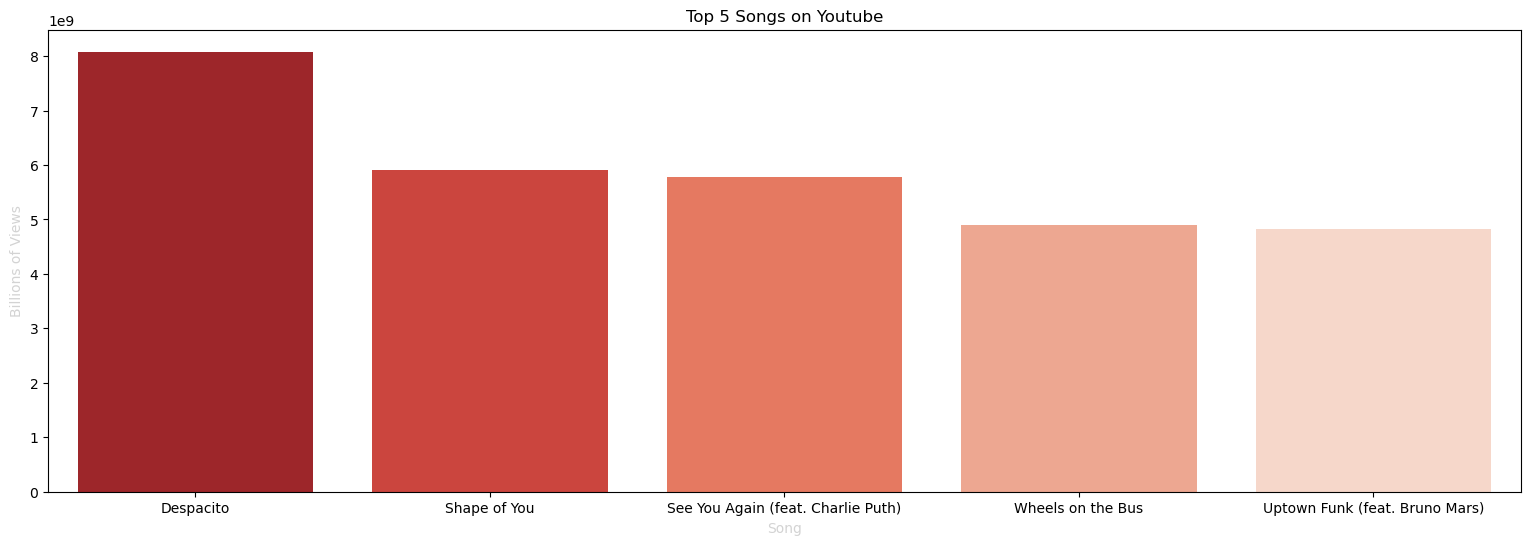

In [14]:
holdi = df.sort_values(by = 'Views', ascending = False)[['Track', 'Artist', 'Views']].head(7)
plt.figure(figsize=(19,6))
sns.barplot(data = holdi, x= 'Track', y='Views', palette = 'Reds_r')
plt.title("Top 5 Songs on Youtube")
plt.ylabel("Billions of Views", color = 'lightgrey')
plt.xlabel("Song", color = 'lightgrey')
plt.show()

# top 5 songs on Spotify

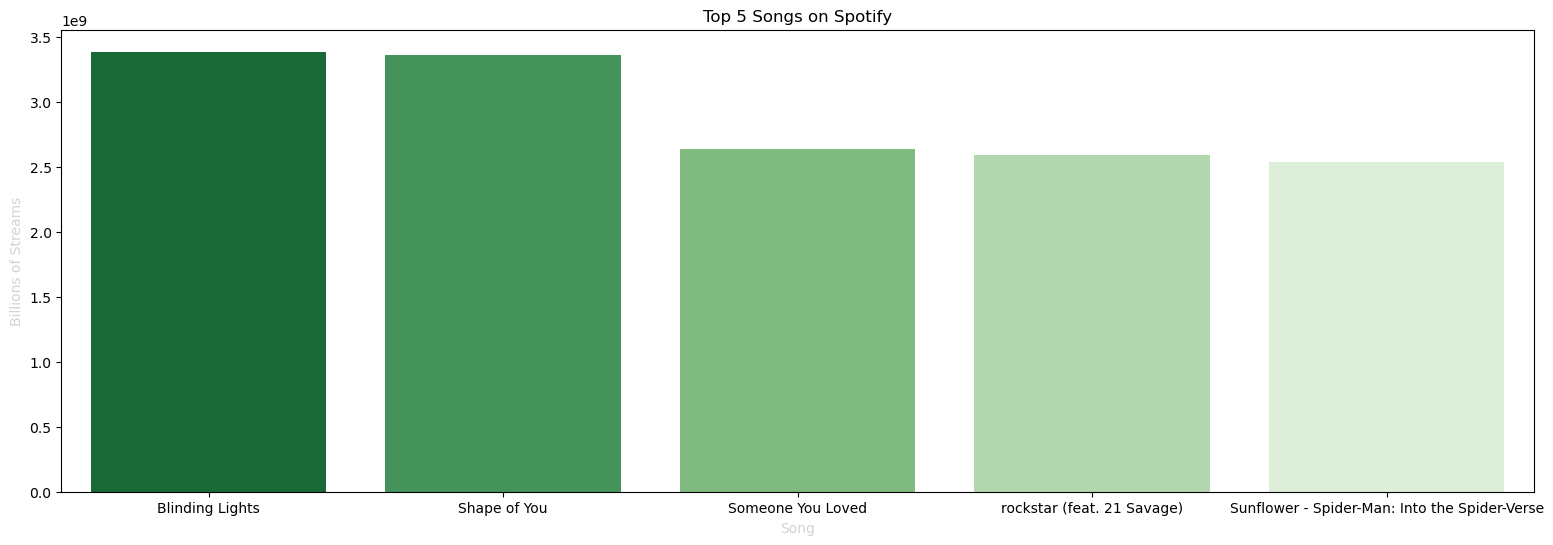

In [15]:
holdi = df.sort_values(by = 'Stream', ascending = False)[['Track', 'Artist', 'Stream']].head(6)
plt.figure(figsize=(19,6))
sns.barplot(data = holdi, x= 'Track', y='Stream', palette = 'Greens_r')
plt.title("Top 5 Songs on Spotify")
plt.ylabel("Billions of Streams", color = 'lightgrey')
plt.xlabel("Song", color = 'lightgrey')
plt.show()

# this is the view distribution of the whole dataset

Text(0.0, 1.0, 'View Distribution of Top Songs')

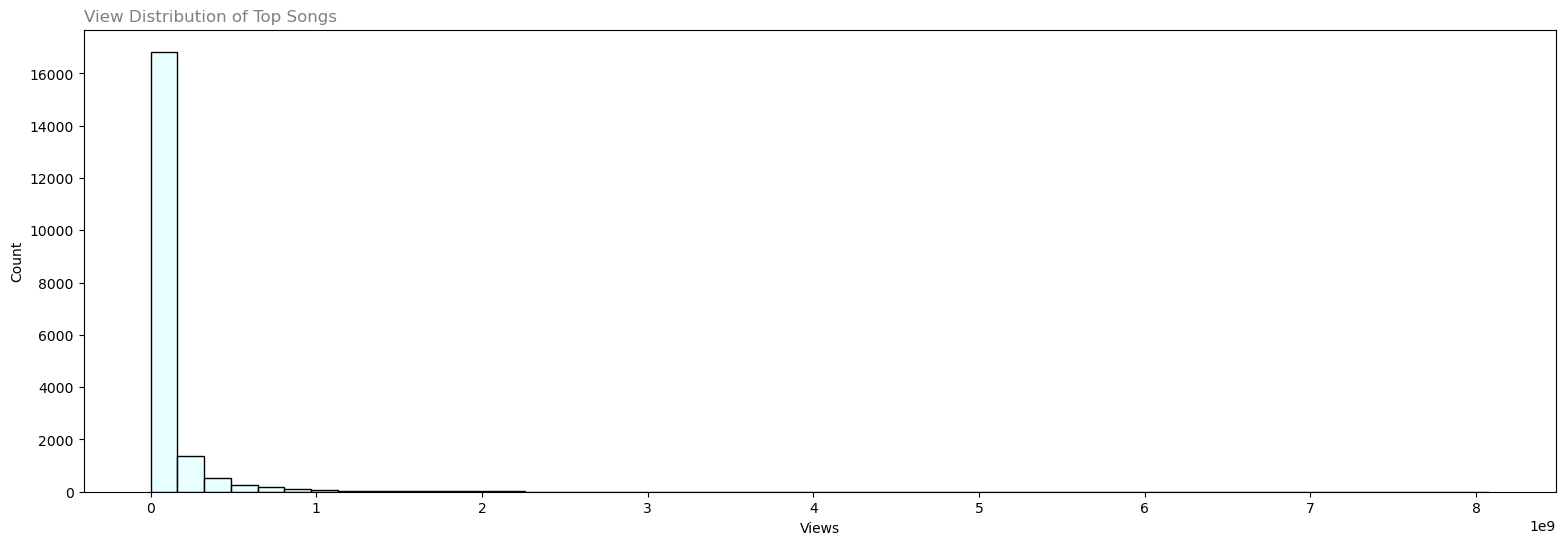

In [16]:
df5 = df['Views'].sort_values(ascending = True).head(18000)
plt.figure(figsize=(19,6))
sns.histplot(x = df['Views'], bins = 50, color = 'lightcyan')
plt.title("View Distribution of Top Songs", loc = 'left', color = 'grey')

# versus the top 1000

Text(0.0, 1.0, 'View Distribution of Top 1000 Songs')

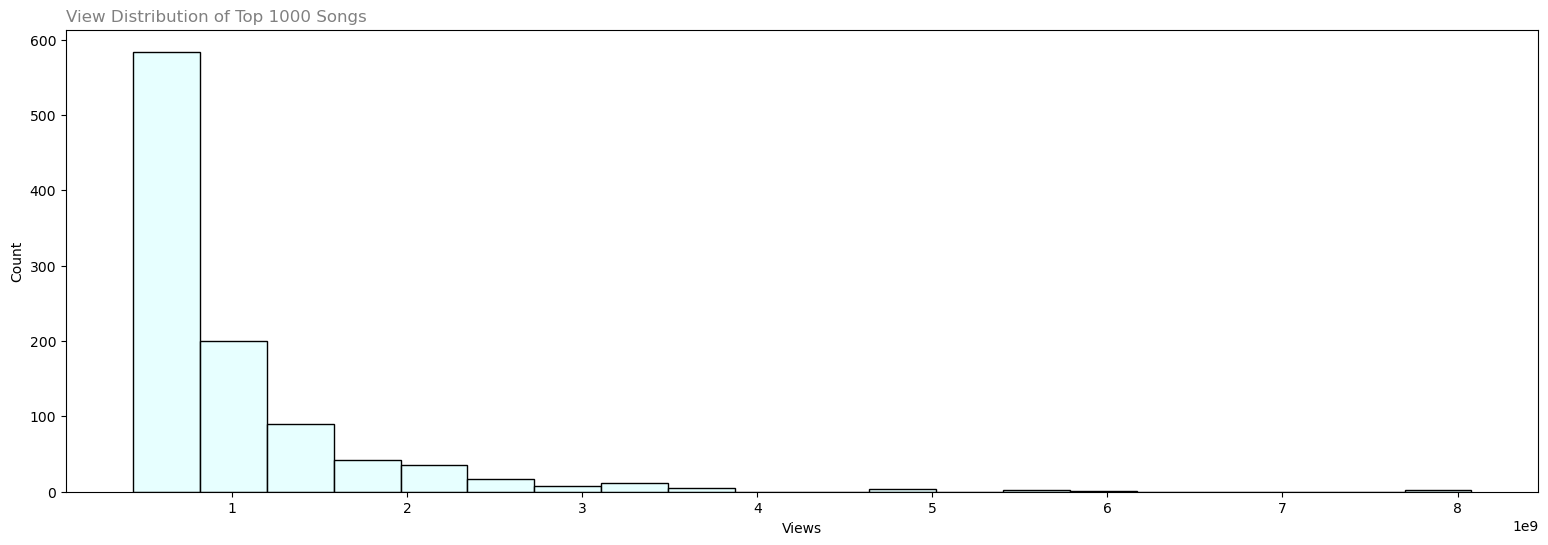

In [17]:
df6 = df['Views'].sort_values(ascending = False).head(1000)
plt.figure(figsize=(19,6))
sns.histplot(x = df6, bins = 20, color = 'lightcyan')
plt.title("View Distribution of Top 1000 Songs", loc = 'left', color = 'grey')

# only 1.54% of these videos have reached a billion views. Thus, 98% of the top songs lie between 0-1b views.

In [18]:
# 1,000,000
(1 - len(df[df['Views'] < 1000000000]) / len(df)) * 100

1.5192592971507546

In [19]:
df.sort_values(by = 'Stream', ascending = False)[['Track', 'Artist', 'Stream']].head(10)

,Track,Artist,Stream
15250,Blinding Lights,The Weeknd,3.386520e+09
12452,Shape of You,Ed Sheeran,3.362005e+09
19186,Someone You Loved,Lewis Capaldi,2.634013e+09
17937,rockstar (feat. 21 Savage),Post Malone,2.594927e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2.538330e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,Swae Lee,2.538330e+09
13503,One Dance,Drake,2.522432e+09
16028,Closer,Halsey,2.456205e+09
16099,Closer,The Chainsmokers,2.456205e+09
14030,Believer,Imagine Dragons,2.369272e+09


# top albums in this dataset

In [20]:
df.groupby('Album').sum()['Views'].sort_values(ascending = False).head(10)

Album
VIDA                                  2.114088e+10
See You Again (feat. Charlie Puth)    1.154760e+10
The Heist                             1.124059e+10
CoComelon Kids Hits, Vol. 1           1.051820e+10
÷ (Deluxe)                            9.666639e+09
PRISM                                 7.820546e+09
What Is Love? (Deluxe Edition)        7.378171e+09
Peace Is The Mission (Extended)       6.649670e+09
MALA SANTA                            6.421337e+09
Purpose (Deluxe)                      5.846258e+09
Name: Views, dtype: float64

# Videos with the highest like ratios

In [21]:
df['like_percent'] = df['Likes']/ df['Views']
df['like_percent'] = df['like_percent'].apply(lambda x: round(x, 3))
df2 = df[df['Views'] > 5000000]
df2.sort_values(by = 'like_percent', ascending = False).head(10)[['Artist', 'Track', 'Views', 'like_percent']]

,Artist,Track,Views,like_percent
19970,j-hope,Blue Side (Outro),16504576.0,0.143
8098,RM,Still Life (with Anderson .Paak),14483104.0,0.112
19963,j-hope,Arson,42659733.0,0.095
19965,j-hope,MORE,63707847.0,0.094
18889,NCT DREAM,Life Is Still Going On,10972776.0,0.084
8097,RM,Wild Flower (with youjeen),46284905.0,0.081
9695,Megan Thee Stallion,Butter - Megan Thee Stallion Remix,69255155.0,0.079
12490,Taylor Swift,Lavender Haze,14004124.0,0.077
12224,Wale,Change,23052210.0,0.074
18467,Louis Tomlinson,Bigger Than Me,5894217.0,0.072


# video duration distribution

<AxesSubplot:title={'left':'Song Length Distribution (seconds)'}, xlabel='seconds', ylabel='[]'>

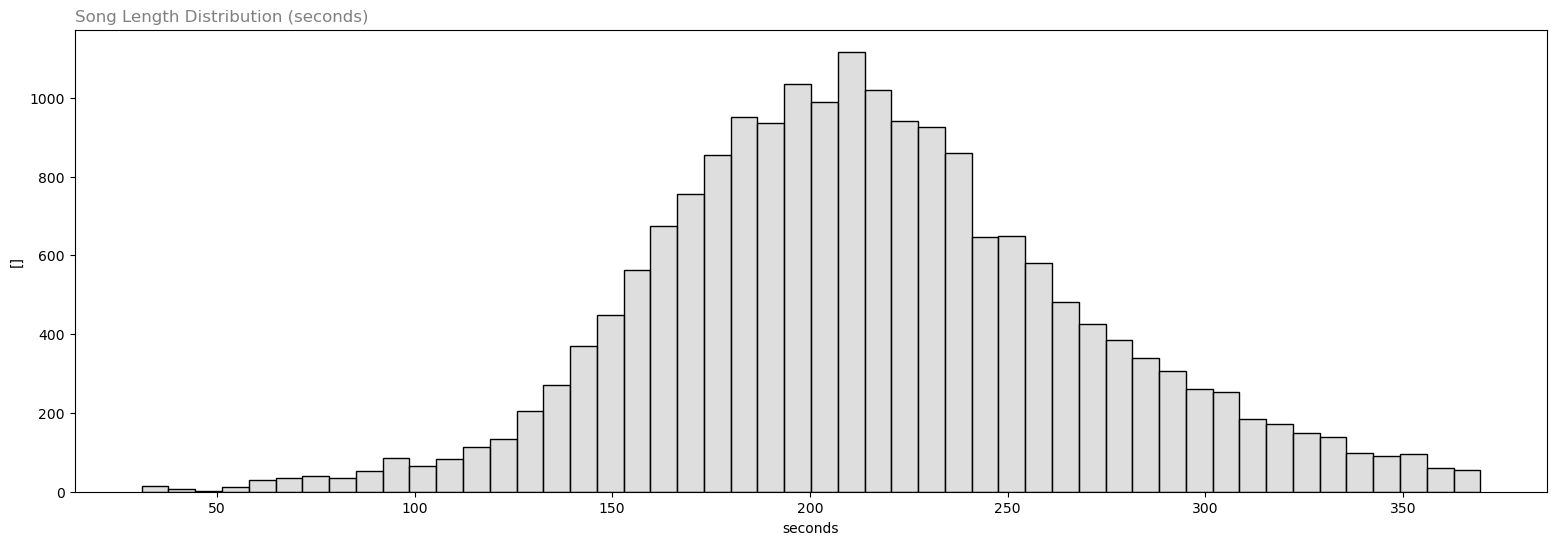

In [22]:
df['seconds'] = df['Duration_ms'].apply(lambda x: x/1000)
df3 = df['seconds'].sort_values(ascending = True).head(19000)
plt.figure(figsize=(19,6))
plt.title("Song Length Distribution (seconds)", loc = 'left', color = 'grey')
plt.ylabel([])
sns.histplot(df3, bins = 50, color = 'lightgrey')

# Classification of Artist Based on Pitch, Valence, Rhythm, ETC

### goal: using the numerical data to classify the artist

In [23]:
example = df.head(29)
y_r = example['Artist']
y = pd.factorize(y_r)[0]
X = example.iloc[:, 8:17]
boolx  =  pd.DataFrame(X)
boolx['Artist_num'] = y
boolx['Artist'] = example['Artist']
X = boolx

### as an example, we will use these three artists: 

In [24]:
y_r.unique()

array(['Gorillaz', 'Red Hot Chili Peppers', '50 Cent'], dtype=object)

### here are the features for our model averaged out from the 10 songs we will be using to train

In [25]:
boolx.groupby('Artist_num').mean()

,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views
Artist_num,,,,,,,,,
0,-6.030000,0.079630,0.024090,0.117292,0.264110,0.6572,132.747000,238562.800000,2.043943e+08
1,-5.546200,0.052520,0.039500,0.011417,0.144860,0.5221,99.153600,275298.700000,4.061566e+08
2,-4.307222,0.336667,0.139067,0.000892,0.163967,0.7230,97.158222,221475.777778,5.066611e+08


## I factorized the artist's names and here is the correlation matrix for each of our features on artist_name. As you can see speechiness is highly correlated, etc.

In [26]:
boolx.corr()['Artist_num']

Loudness            0.277019
Speechiness         0.744803
Acousticness        0.524782
Instrumentalness   -0.461078
Liveness           -0.259978
Valence             0.115553
Tempo              -0.579708
Duration_ms        -0.152022
Views               0.334523
Artist_num          1.000000
Name: Artist_num, dtype: float64

## here's a 3d model of what we're trying to do

In [27]:
fig = px.scatter_3d(boolx, x='Acousticness', y='Tempo', z='Speechiness', color = 'Artist')
fig.show()

# as you can see certain artists drift towards certain traits in all of their music. 50 cent, being a rapper has the highest "speechiness," which is the amount of spoken word in a track. Gorillaz music has a higher tempo, and seems to be clustered on the higher end of that axis. 

![](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.xl-retina.ts=1653407890466.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image)

## this is why we will use knn along w some other models to try and classify the artist 

### example knn

In [28]:
#KNearestNeighbors model
X = X.drop('Artist', axis = 1)
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X, y)
knn2.score(X, y)

1.0

# as you can see our model get's a perfect score on classification

# now, let's try with the whole dataset:

In [29]:
X = df.iloc[:, 8:16]
y = df['Artist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [30]:
model = LogisticRegression(solver='sag', random_state=0)

In [31]:
# as you can see our decision tree has a very high score. It does not perform well with the test values but this is understood
# given there are different artists. 
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
s = clf.predict(X_train)
score = np.array([s, y_train])
score = score.T
pd.DataFrame(score).head(10)

,0,1
0,Hariharan,Hariharan
1,Kris Kristofferson,Waylon Jennings
2,will.i.am,will.i.am
3,Belanova,Belanova
4,Luchè,Luchè
5,Becky Hill,Becky Hill
6,Rush,Rush
7,Thin Lizzy,Thin Lizzy
8,C. Tangana,C. Tangana
9,Turma do Pagode,Turma do Pagode


In [32]:
clf.score(X_train, y_train)

0.9126750374618922

In [33]:
X_train

,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
2471,-7.697,0.0361,0.134000,0.000005,0.1530,0.757,129.987,325363.0
4209,-14.647,0.0311,0.526000,0.056400,0.2520,0.723,148.030,192427.0
8243,-3.446,0.0445,0.004730,0.000000,0.1450,0.282,128.954,279027.0
11206,-2.739,0.0412,0.000371,0.018200,0.0659,0.610,75.019,164507.0
15113,-6.084,0.2330,0.113000,0.000000,0.1140,0.737,120.255,152000.0
...,...,...,...,...,...,...,...,...
12049,-8.336,0.3100,0.246000,0.000000,0.1890,0.580,92.791,207187.0
12779,-5.886,0.0357,0.188000,0.000000,0.1460,0.225,104.036,262467.0
5744,-6.063,0.0317,0.215000,0.000000,0.3520,0.535,166.015,219267.0
912,-10.233,0.0845,0.005420,0.000000,0.1710,0.467,144.992,239413.0


In [34]:
test1 = np.array(X_train.loc[5881]).reshape(1,8)
clf.predict(test1)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['Mandy Moore'], dtype=object)

In [35]:
y_train.loc[5881]

'Mandy Moore'

In [36]:
neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
neighbors.score(X_train, y_train)

0.9126750374618922

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [39]:
# initial randomn forest
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [40]:
rdf.score(X_train, y_train)

0.015604815790833462

In [41]:
X, y = make_classification(n_samples=20000, n_features=8, n_informative=8 , n_redundant=0, random_state=0, shuffle=False)
rdf2 = RandomForestClassifier(max_depth=28, random_state=0)
rdf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=28, random_state=0)

In [42]:
rdf2.score(X_train, y_train)

0.9126233658864259

## it is worth noting that when classifying completely new songs the model performs much worse, but this is also because it is only trained with at MOST 10 songs per artist

In [43]:
rdf2.score(X_test, y_test)

0.030612244897959183